## Question 1:
For full marks, you must justify your answers, clearly explain all steps and compu- tations, label your figures, and write concise code

(a) Load the neurons group 1.csv dataset into Python as a pandas DataFrame.

In [41]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [42]:
#Load in necessary packages
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [43]:
#Load dataset as pandas dataframe
neurons1 = pd.read_csv('neurons_group_1.csv')

In [44]:
neurons1.head()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,484775243,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135
1,485996843,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704
2,486041253,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796
3,491119181,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517
4,491119245,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240


(b) Inspect the data. How many neurons are included in this dataset? How many different measurements are included? Does this dataset contain any missing values?

In [45]:
num_neurons = neurons1.shape[0] 
num_measurements = neurons1.shape[1]
print('There are',num_neurons,'neurons and',num_measurements,'measurements in the dataset')

There are 311 neurons and 9 measurements in the dataset


In [46]:
neurons1.isna().sum()

id                  0
average_diameter    0
overall_depth       0
overall_height      0
overall_width       0
soma_surface        0
total_length        0
total_surface       0
total_volume        0
dtype: int64

As we can see from the above output, the dataset does not contain any missing values.

(c) Perform an exploratory data analysis, creating both numerical and graphical sum- maries of the data. Discuss and interpret your results.

In [47]:
neurons1_numerical = neurons1.loc[:, neurons1.columns != 'id']
neurons1_numerical.describe()

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.421175,91.967024,523.516774,320.548089,361.849689,3792.940198,5492.737135,808.488483
std,0.159435,35.658760,299.256684,124.039953,253.912293,2775.993259,5719.713426,1190.466808
min,0.053899,22.680000,82.836871,49.173247,2.895610,251.987893,402.242787,4.309842
25%,0.322128,64.574450,328.964661,233.480547,176.194233,2237.031837,2253.626506,197.071679
50%,0.415613,86.212200,469.151885,291.532148,311.568275,2946.858866,3636.755377,407.180171
75%,0.527572,115.566350,651.885452,392.534334,478.796933,4085.692910,5895.663836,833.681728
max,1.156730,183.960000,1928.118350,827.752239,1283.720986,15697.415190,37182.284100,8482.061401


As we can see from the Numerical summary, there seems to be quite a bit of variability wihtin the variables, as can be seen from the plots below. We can also see that the variable overall depth, has a low variability relative to this dataset, as its mean, max and min are relatively closer together than other variables. For overall width, on the higher end of the data it seems that there isnt much variable, as the difference between the 3rd quartile (75%) and the max value isnt high. However the minimum value spreads this variable out as it is only a fraction of the mean. 

<AxesSubplot:xlabel='total_volume'>

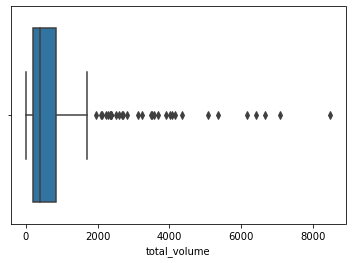

In [48]:
sns.boxplot(neurons1_numerical['total_volume'])

As we can see here, for the total volume there seems to be a number of outliers. When referring to the numerical summary above, we can see that some of these outliers are 10X the mean value. This means this variable carries less statistical significance than those with less variability.

<AxesSubplot:xlabel='soma_surface'>

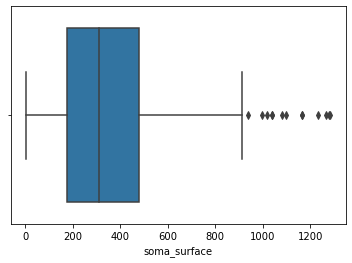

In [49]:
sns.boxplot(neurons1_numerical['soma_surface'])

As you can see clearly here, the mean for soma surface is around 350 (361.849689 precisely from above), however we can notice here that there is a number of outliers for this variable, visible on the right side of the plot. Some of these outliers appear to be quite extreme, some of which ≥ 3X the mean value. The spread of this variable is also very large, ranging from 2.895610 to 1283.720986, further reducing the statistical significance of this variable. 

Text(0.5, 0, 'Average Neuron Diameter')

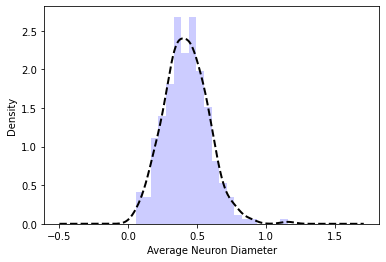

In [50]:
neurons1.average_diameter.hist(bins=20,density=True,color='b',alpha=0.2)
neurons1.average_diameter.plot(kind='kde',style='k--',linewidth=2.0)
plt.xlabel('Average Neuron Diameter')

As we can see, the Average Neuron Diameter seems to be normally distributed around a mean of 0.4, which lines up with the actual mean given above, 0.421175. 

Text(0.5, 0, 'Overall Depth of Neurons')

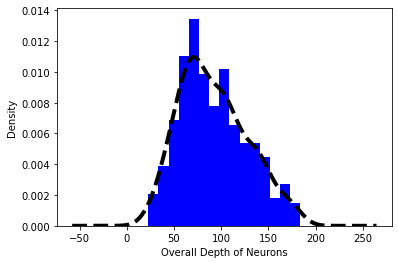

In [51]:
neurons1.overall_depth.hist(bins=15,density=True,color='b',alpha=1)
neurons1.overall_depth.plot(kind='kde',style='k--',linewidth=4)
plt.xlabel('Overall Depth of Neurons')

As we can see here, the Overall Depth of Neurons seems to have a Right Skewed distribution. This infers that the Mean is greater than the mode and median for this measurement. 

## Question 2

(a) Load the neurons group 2.csv dataset into Python as a pandas DataFrame.

In [52]:
neurons2 = pd.read_csv('neurons_group_2.csv')

(b) Inspect the data. How many neurons are included in this dataset? Are the measurements the same as those in neurons_group 1.csv?


In [53]:
neurons2.head()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,397905347,0.316091,117.5429,585.602322,287.122628,268.777679,3498.090031,3523.606841,306.290931
1,491119234,0.331268,81.9012,461.280515,275.146120,551.788645,2008.302439,2097.688550,188.431435
2,491119269,0.139015,57.5697,324.422347,280.851229,50.092109,1774.258366,776.076427,25.733000
3,491119394,0.230412,76.0357,368.298267,251.377567,244.457685,1650.188964,1198.531518,75.823080
4,491119419,0.321163,98.8344,417.890620,193.590563,252.423672,2066.369729,2085.789861,180.446414


In [54]:
num_neurons2 = neurons2.shape[0] 
num_measurements2 = neurons2.shape[1]
print('There are',num_neurons2,'neurons and',num_measurements2,'measurements in the dataset')

There are 390 neurons and 9 measurements in the dataset


In [55]:
if list(neurons1.columns) == list(neurons2.columns):
    print("The measurements are the same in both datasets")
else:
    print("Not the same")

The measurements are the same in both datasets


(c) Perform a t-test, for each of the measurements, to test whether any of the neuron properties differ between the group 1 and group 2. Use a significance level of α = 0.01. Display the t-score and p-value for each measurement. Clearly state the conclusion of your tests and explain your reasoning.


In [64]:
from scipy import stats


In [66]:
from scipy.stats import ttest_ind

# define the significance level and store as a variable
alpha = 0.01

# create a list of the variables to test
vars = ['id', 'average_diameter', 'overall_depth', 'overall_height', 'overall_width',
        'soma_surface', 'total_length', 'total_surface', 'total_volume']

# iterate over the variables, performing the t-test on each one
for var in vars:
    # perform the t-test
    t, p = stats.ttest_ind(neurons1[var], neurons2[var])
    
    # print the results
    print(f"{var}: t = {t:.3f}, p = {p:.3f}")
    
    # determine whether the difference is statistically significant and print the result
    if p < alpha:
        print(f"There is a statistically significant difference for {var} (p < {alpha})")
    else:
        print(f"There is no statistically significant difference for {var} (p >= {alpha})")

id: t = 0.762, p = 0.446
There is no statistically significant difference for id (p >= 0.01)
average_diameter: t = -1.197, p = 0.232
There is no statistically significant difference for average_diameter (p >= 0.01)
overall_depth: t = -1.186, p = 0.236
There is no statistically significant difference for overall_depth (p >= 0.01)
overall_height: t = 0.586, p = 0.558
There is no statistically significant difference for overall_height (p >= 0.01)
overall_width: t = -0.923, p = 0.356
There is no statistically significant difference for overall_width (p >= 0.01)
soma_surface: t = -0.548, p = 0.584
There is no statistically significant difference for soma_surface (p >= 0.01)
total_length: t = -0.333, p = 0.740
There is no statistically significant difference for total_length (p >= 0.01)
total_surface: t = -0.815, p = 0.415
There is no statistically significant difference for total_surface (p >= 0.01)
total_volume: t = -0.931, p = 0.352
There is no statistically significant difference for tot

## Question 3:

(a) Load the neurons additional measurements.csv into Python and combine all three datasets into a single DataFrame.

In [67]:
neurons_add = pd.read_csv('neurons_additional_measurements.csv')
neurons_add.head()
neurons_add

,id,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,491119743,82.727781,0.864267,20.723077,0.964510,6,99.779724,126.593790,33,73,1470,7,40
1,546781359,82.506680,0.903890,105.277778,0.862183,3,432.383110,496.831994,9,23,2011,5,14
2,537042261,77.536678,0.863104,73.666667,0.926633,6,373.630444,436.958952,21,46,3137,4,25
3,689123605,76.583222,0.900537,95.979167,0.942049,11,943.382549,989.448318,24,52,4652,4,28
4,657879305,72.019250,0.873518,47.535714,1.000000,5,186.218009,221.639502,14,32,1406,4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,591276216,80.712983,0.869245,31.283333,0.981943,11,272.156210,326.773120,30,65,2088,5,35
690,496163999,56.393455,0.912145,93.900000,0.780672,1,194.308797,201.927065,5,18,1284,8,13
691,675799126,74.569053,0.892567,92.023077,0.974234,18,1046.365593,1157.225329,65,139,12338,9,74
692,667319659,83.006268,0.897934,118.800000,0.991928,3,379.871901,420.167325,10,26,2468,6,16


In [68]:
neurons3 = pd.concat([neurons1, neurons2])
all_neurons = pd.merge(neurons3,neurons_add)
all_neurons.head()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,...,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,484775243,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135,78.026948,...,48.081967,0.866582,7,476.921223,550.691106,31,70,3041,8,39
1,485996843,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704,86.349668,...,52.416667,0.950502,15,650.637430,957.710930,30,67,3271,7,37
2,486041253,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796,71.911353,...,73.821429,0.816243,5,477.440600,569.974920,14,32,2151,4,18
3,491119181,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517,72.177287,...,42.266667,0.822614,4,212.448082,249.521471,16,35,1292,3,19
4,491119245,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240,70.758367,...,39.733333,0.803137,3,242.351930,258.868561,15,36,1397,6,21


(b) Comment on the dimensions of the combined dataset. Are all of the neurons from
group 1 and 2 included in the dataset neurons additional measurements.csv?

In [69]:
print(all_neurons.shape)

(694, 21)


There were 311 observations recorded for neurons group 1 and 390 for neurons group 2. This should result in a dataframe with 701 observations, however we observe that there are only 694 observations in the final dataframe, indicating that 7 have been excluded. This is due to the fact that the addition neurons dataframe only has 694 obersvations, meaning 7 observations from the 1st two dataframes are not included in the final dataframe. 


(c) Compute the Pearson correlation coefficient between each of the measurements and identify which morphological features are strongly correlated. List the four most strongly correlated pairs.

<AxesSubplot:>

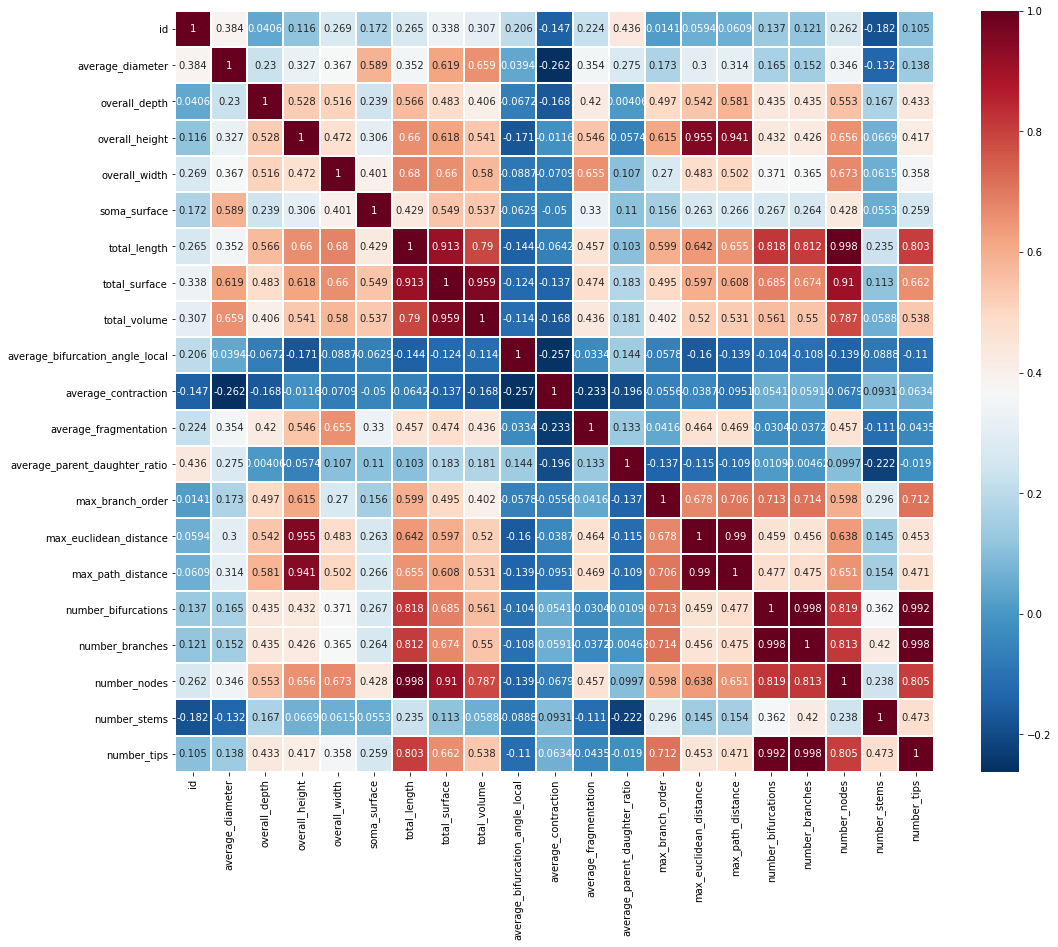

In [70]:
#Creating a correlation matrix of all of the pairs, using the seaborn heatmap feature. 
#Four most strongly correlated pairs listed below
#Stronger the correlation -> Darker the Color on the Heatmap
import matplotlib.pyplot as plt
pearsoncorr = all_neurons.corr(method='pearson')
plt.figure(figsize=(17, 14))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1,
            fmt='.3g')

In [71]:
#Set threshold value for cutoff point for highly correlated pairs
threshold = 0.99
print("The 4 most strongly correlated pairs are: ")
#Create a list of strings which are the highest correlated pairs, which must have corr coefficient>threshold
[f"{pearsoncorr.columns[i]} and {pearsoncorr.columns[j]}" for i, j in zip(*np.where(np.abs(pearsoncorr.values) > threshold)) if i < j]

The 4 most strongly correlated pairs are: 


['total_length and number_nodes',
 'number_bifurcations and number_branches',
 'number_bifurcations and number_tips',
 'number_branches and number_tips']


(d) Create scatter plots for the each of the strongly correlated pairs identified in (c). Are the relationships as expected from the correlation coefficients?


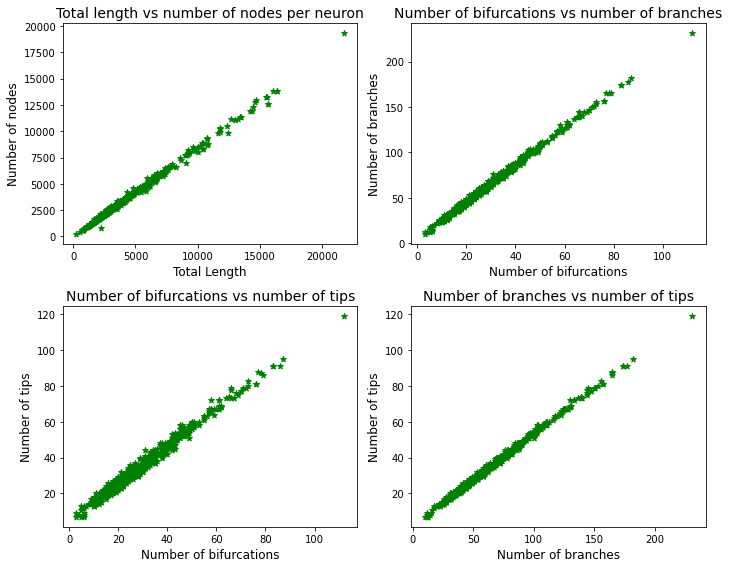

In [72]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

# Create a list of tuples containing the x and y data, as well as the labels and titles for each plot
plot_data = [
    (all_neurons.total_length, all_neurons.number_nodes, "Total Length", "Number of nodes", "Total length vs number of nodes per neuron"),
    (all_neurons.number_bifurcations, all_neurons.number_branches, "Number of bifurcations", "Number of branches", "Number of bifurcations vs number of branches"),
    (all_neurons.number_bifurcations, all_neurons.number_tips, "Number of bifurcations", "Number of tips", "Number of bifurcations vs number of tips"),
    (all_neurons.number_branches, all_neurons.number_tips, "Number of branches", "Number of tips", "Number of branches vs number of tips"),
]

# Loop through the list of tuples and create a scatter plot for each subplot
for ax, (x, y, xlabel, ylabel, title) in zip(axes.flatten(), plot_data):
    ax.scatter(x, y, color='g', marker='*', label='Data')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)

# Adjust the layout and show the figure
fig.tight_layout()
plt.show()


As these scatterplots show a very high correlation between the pairs, it lines up with the fact that these are the highest correlated pairs obtained above. 

## Question 4 
Linear regression to predict the total surface area of a neuron (total surface).
(Remaining morphological measurements to be used as predictor variables.)

(a) Separate the data into response and predictor variables and standardise the predictor variables.

In [73]:
X = all_neurons.loc[:, ~all_neurons.columns.isin(['id','total_surface'])]
y = Series(all_neurons['total_surface'])
X_std = (X - X.mean())/X.std()

In [74]:
X_std.head()

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_volume,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,-1.448772,-0.096352,0.111315,-0.518593,-0.941779,-0.061858,-0.560910,0.426456,-0.335948,-0.370420,-0.773570,-0.172691,0.336109,0.392372,0.222823,0.282720,-0.095389,0.977580,0.338504
1,0.174141,-0.188422,0.709689,-0.955790,0.250071,0.116918,-0.100197,1.432544,-5.987405,-0.192687,0.325004,1.722134,1.098971,2.031672,0.156511,0.185891,0.001901,0.499469,0.213179
2,-0.830426,-0.513683,0.236540,0.455299,0.531507,-0.416059,-0.499842,-0.312825,-0.309421,0.684963,-1.432538,-0.646397,0.338390,0.470039,-0.904479,-0.943779,-0.471859,-0.934867,-0.977409
3,-0.095939,-0.131937,-0.826138,-0.651629,0.065570,-0.817677,-0.469546,-0.280678,0.515598,-0.608862,-1.349144,-0.883251,-0.825305,-0.820610,-0.771855,-0.846950,-0.835216,-1.412979,-0.914747
4,-1.413495,-1.369353,-0.764399,-0.017297,-0.973471,-0.789824,-0.606731,-0.452203,1.329960,-0.712736,-1.604103,-1.120104,-0.693985,-0.782964,-0.838167,-0.814674,-0.790801,0.021357,-0.789422


(b) Fit a linear regression model and interpret the fitted model.


In [75]:
X_std.insert(0,'intercept',1)

In [76]:
mod = sm.OLS(y,X_std).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_surface   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     4465.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:08:36   Log-Likelihood:                -5362.3
No. Observations:                 694   AIC:                         1.076e+04
Df Residuals:                     675   BIC:                         1.085e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept                        5705.7931     21.123    270.127      0.000    5664.319    5747.267
average_diameter                  693.1540     36.058     19.223      0.000     622.354     763.953
overall_depth                    -130.8024     31.030     -4.215      0.000    -191.730     -69.875
overall_height                   -296.8748     90.839     -3.268      0.001    -475.235    -118.514
overall_width                      25.8528     38.994      0.663      0.508     -50.712     102.418
soma_surface                       56.9857     28.512      1.999      0.046       1.004     112.968
total_length                     3956.4533    411.041      9.625      0.000    3149.380    4763.526
total_volume                     2994.2462     48.152     62.183      0.000    2899.701    3088.792
average_bifurcation_angle_local    -5.6851     22.755     -0.250      0.803     -50.365      38.994
average_contraction                32.2640     26.690      1.209      0.227     -20.141      84.669
average_fragmentation             -95.7414     49.252     -1.944      0.052    -192.446       0.963
average_parent_daughter_ratio      54.8073     24.030      2.281      0.023       7.624     101.990
max_branch_order                  -26.1737     42.612     -0.614      0.539    -109.841      57.494
max_euclidean_distance            636.0267    188.029      3.383      0.001     266.835    1005.218
max_path_distance                -346.6786    181.393     -1.911      0.056    -702.841       9.484
number_bifurcations             -3895.7825   6022.607     -0.647      0.518   -1.57e+04    7929.514
number_branches                  1985.8946   3204.822      0.620      0.536   -4306.724    8278.513
number_nodes                     -813.9945    408.079     -1.995      0.046   -1615.251     -12.738
number_stems                     -458.2155    620.789     -0.738      0.461   -1677.125     760.694
number_tips                      1897.7216   3070.338      0.618      0.537   -4130.840    7926.283
==============================================================================
Omnibus:                      611.210   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32896.241
Skew:                          -3.626   Prob(JB):                         0.00
Kurtosis:                      35.940   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.69e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

As we can see from the R-squared value given in the Linear regression model above, a large amount of the data is explained by the model. In this case, the R-squared value of 0.992 is very high, meaning that the model is a good fit for the data. 

The F-statistic provide an insight into the statistical significance of the model. In this case we have a very high F-statistic of 4465 with a very small prob value, indicating that the model is significantly different from a model with coefficients all set to 0. 

Below this, we are given a table that gives the coef,  std err, t value, P>|t|, 0.025 and 0.975 values for each measurement.

The coef values indicate the relationship between the given predictor variable and the target variable. For example, the coef value for number_tips is 1897.7216 tells us that on average, an increae in 1 unit of number_tips is associated with an increase of 1897.7216 units for the target variable. 

The std err (standard error) value gives respective standard error values for each of the estimated coefficients. For example, the std err value for overall depth is 31.030, telling us that the true value of the coefficient is probably within 31.030 units of the estimated coefficient. 

The t and p values are then given in the next columns, which test the null hyptotheses that the actual coefficient is 0. For example, the P>|t| value for overall height is 0.001, indicating that the null hypothesis can be rejected, inferring that the actual coefficient is significantly different from 0.

(c) Perform a forward selection Akaike Information Criterion (AIC) regression. Examine the selected model and discuss your findings in relation to the model fitted in part (b).

In [77]:
#Define the function
def forwardAIC(X,y):
    #Fit an OLS model with the 1st predictor and store the first AIC value
    mod = sm.OLS(y, X_std.iloc[:,0]).fit()
    best_aic = mod.aic
    #create and initialize a loop variable. Here, I also create a list for the predictor variables we will choose
    bad_model = True
    chosen_vars = [0]
    #Creating a list of the unused remainder predictors
    remaining_vars = range(1,X_std.shape[1])
    while(bad_model):
        #Arrays to store and AIC scores and differenes
        curr_aic = np.empty(len(remaining_vars))
        curr_aic_diff = np.empty(len(remaining_vars))
        #For loop to go over remaining predictors
        for count, i in enumerate(remaining_vars):
            #Creating lists for current predictors, and fitting an OLS using this list, and then store the AIC
            curr_vars = np.append(chosen_vars,i)
            curr_mod = sm.OLS(y, X_std.iloc[:,curr_vars]).fit() 
            curr_aic[count] = curr_mod.aic
            #Calc diff between current and best AIC score
            curr_aic_diff[count] = curr_mod.aic - best_aic
        #Checking if there are any predictors left over and if none, exit loop    
        if len(remaining_vars)==0:
            bad_model=False
        #Checking if min AIC difference found above is positive or negative, and if positive, exit    
        elif np.min(curr_aic_diff)>0:
            bad_model = False
        else:
            #update and store best AIC along with the selected predictors
            best_var = remaining_vars[np.argmin(curr_aic_diff)]
            best_aic = curr_aic[np.argmin(curr_aic_diff)]
            chosen_vars = np.append(chosen_vars,best_var)
            remaining_vars = [x for x in remaining_vars if x != best_var]
    #Return list of these selected predictors
    return chosen_vars    

In [78]:
ans = forwardAIC(X_std,y)
print(ans)
print(X_std.columns[ans])

[ 0  7  6  1  2 18 17  5 11  9 15 10  4]
Index(['intercept', 'total_volume', 'total_length', 'average_diameter',
       'overall_depth', 'number_stems', 'number_nodes', 'soma_surface',
       'average_parent_daughter_ratio', 'average_contraction',
       'number_bifurcations', 'average_fragmentation', 'overall_width'],
      dtype='object')


In [79]:
ans = forwardAIC(X_std,y)
mod = sm.OLS(y, X_std.iloc[:,ans])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          total_surface   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6583.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:08:48   Log-Likelihood:                -5371.2
No. Observations:                 694   AIC:                         1.077e+04
Df Residuals:                     681   BIC:                         1.083e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

The results of the forward selection AIC regression boast another very high R-squared value of 0.991, which is roughly the same as the corresponding R-squared value found in the linear regression model. This tells us the model explains around 99.1% of the variation in the data. 

For the coefficients provided from the forward selection AIC, we can observe that for the most part they are similar to their corresponding Linear regression coefficients. There are a few significant differences for some of the measurements, such as number of stems and number of nodes: AIC coefficients of -56.7562 and -598.5320 Vs. Linear Reg. coefficients: -458.2155 and -813.9945. The fact that these coefficients are reduced in the forward selection AIC regression, may suggest they dont explain a change in the target variable for a 1 unit change in their own measurement as much as we may have anticipated after inspecting the Linear regression model. 

We can also see that the |P>|t| values are even smaller across the board as expected. This makes sense as we would expect these coefficients of the selected measurements would be small enough to reject the null hypothesis and conclude that its coeffiecent is different from 0. 

Overall we can conclude that the predictor variables are good at predicting the target variable for this dataset. 


(d) Perform a forward selection Bayes Information Criterion (BIC) regression. Examine the selected model and discuss your findings in relation to the models fitted in part (b) and (c)

In [80]:
# Define the function
def forwardBIC(X,y):
    # Fit an OLS model with the 1st predictor and store the first BIC value
    mod = sm.OLS(y, X_std.iloc[:,0]).fit()
    best_bic = mod.bic
    
    # Create and initialize a loop variable. Here, I also create a list for the predictor variables we will choose
    bad_model = True
    chosen_vars = [0]
    
    # Creating a list of the unused remainder predictors
    remaining_vars = range(1,X_std.shape[1])
    
    while(bad_model):
        # Arrays to store and BIC scores and differences
        curr_bic = np.empty(len(remaining_vars))
        curr_bic_diff = np.empty(len(remaining_vars))
        
        # For loop to go over remaining predictors
        for count, i in enumerate(remaining_vars):
            # Creating lists for current predictors, and fitting an OLS using this list, and then store the BIC
            curr_vars = np.append(chosen_vars,i)
            curr_mod = sm.OLS(y, X_std.iloc[:,curr_vars]).fit() 
            curr_bic[count] = curr_mod.bic
            
            # Calculate difference between current and best BIC score
            curr_bic_diff[count] = curr_mod.bic - best_bic
        
        # Checking if there are any predictors left over and if none, exit loop
        if len(remaining_vars)==0:
            bad_model=False
        
        # Checking if min BIC difference found above is positive or negative, and if positive, exit
        elif np.min(curr_bic_diff)>0:
            bad_model = False
        else:
            # Update and store best BIC along with the selected predictors
            best_var = remaining_vars[np.argmin(curr_bic_diff)]
            best_bic = curr_bic[np.argmin(curr_bic_diff)]
            chosen_vars = np.append(chosen_vars,best_var)
            remaining_vars = [x for x in remaining_vars if x != best_var]
    
    # Return list of these selected predictors
    return chosen_vars 


In [81]:
ans_bic = forwardBIC(X_std,y)
print(ans_bic)
print(X_std.columns[ans_bic])

[ 0  7  6  1  2 18 17]
Index(['intercept', 'total_volume', 'total_length', 'average_diameter',
       'overall_depth', 'number_stems', 'number_nodes'],
      dtype='object')


In [82]:
mod = sm.OLS(y, X_std.iloc[:,ans_bic])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          total_surface   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.279e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:08:55   Log-Likelihood:                -5384.2
No. Observations:                 694   AIC:                         1.078e+04
Df Residuals:                     687   BIC:                         1.081e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         5705.7931     21.609  

Again we can see that this model is a good fit for the data, giving an R-squared value of 0.991, meaning it explains about 99.1% of the variation in the data. We can again notice very small P>|t| values, telling us that we can reject the null hypothesis that the actual coefficent is 0. The std err column also seems similar to that found in the AIC regression.                
I observed the total length coef in the BIC model is seen to be 4017.9089, compared to 3738.2780 found in the AIC model, suggesting that it may explain a change in the target variable for a 1 unit change in their own measurement more than we anticipated after inspecting the AIC model. The coef for number of nodes also sees a big increase in absolute value, going from -598.5320 in the AIC to -1057.0739 in the BIC, suggesting it has more of an effect on the target variable than anticipated after inspecting both the AIC and linear regression models. 

(e) Explain how using BIC for model selection differs from using AIC.

Forward selection AIC uses the Akaike Information Criterion when evaluating models. It uses a measures the relative goodness of fit of the model on the data. It is moreso based on the likelihood function and finds a balance between the goodness of fit of the model, and its complexity. 
The main difference between this and forward selection BIC is that while BIC is also evaluating the relative goodness of fit of the model, it also induces a penalty for the number of parameters in the model, in an attempt to avoid overfitting. In both of the selection criterion, the model with the lowest respective AIC and BIC values are selected. 

In terms of implementation, it may already be obvious that BIC is more appropriate for datasets with less variables/parameters, while AIC can return better results for more complex data. This brings along that neither model is better than the other, and each model should be considered based on the number of parameters and complexity of the data. 


The non-standardised dataset should be used for all subsequent questions

## Question 5:
Random forest regression to predict the total surface area of a neuron (total surface).

(a) Split the data into appropriate training and test sets.

In [83]:
from sklearn.ensemble import RandomForestRegressor
train_size = 521
np.random.seed(123)
train_select = np.random.permutation(range(len(y)))
X_train = X.iloc[train_select[:train_size],:].reset_index(drop=True)
X_test = X.iloc[train_select[train_size:],:].reset_index(drop=True)
y_train = y[train_select[:train_size]].reset_index(drop=True)
y_test = y[train_select[train_size:]].reset_index(drop=True)

(b) Fit a random forest regression model with 10 trees using the training data. Include the argument random state=101 in the random forest regression function to ensure reproducible results. Determine which variables are most important in predicting the total surface area of a neuron. Discuss your findings in relation to the linear models fit in question 4.

In [84]:
rf = RandomForestRegressor(n_estimators=10,random_state=101)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=101)

In [85]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
importances_sorted = forest_importances.sort_values(ascending=False)
importances_sorted[0:5]

total_volume           0.800816
total_length           0.061871
number_bifurcations    0.050222
number_nodes           0.039964
number_tips            0.024272
dtype: float64

Text(0.5, 0, 'Random Forest Feature Importance')

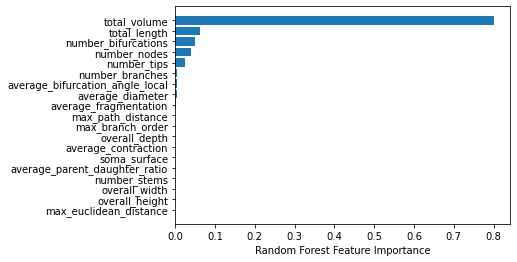

In [86]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

(c) Use the random forest regression model to predict the total surface area of a neuron for the test set. Create a scatter plot of the true surface area of a neuron versus the predicted surface area. Interpret your plot.

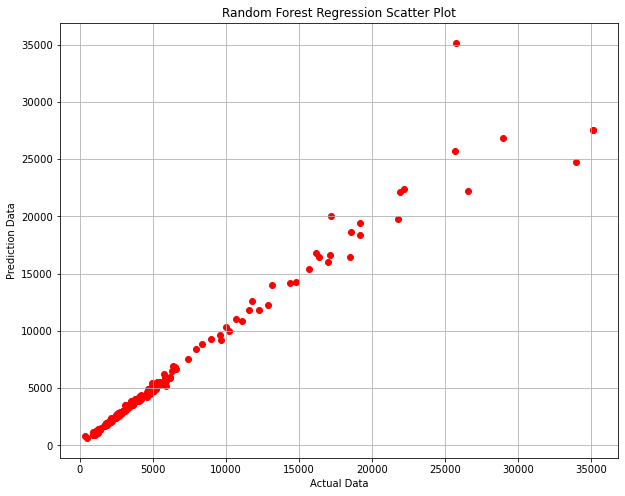

The mean predicted surface area is:  6217.020520895408


In [87]:
rf_test_pred = rf.predict(X_test)
plt.figure(figsize=(10,8))
plt.scatter(y_test, rf_test_pred, color = 'red',label = 'Comparison of True surface area vs. predicted')
plt.grid()
plt.title('Random Forest Regression Scatter Plot')
plt.xlabel('Actual Data')
plt.ylabel('Prediction Data')
plt.show()
print("The mean predicted surface area is: " ,rf_test_pred.mean())

In [88]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Find the model's performance on the test set
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on the test set:", mae)

Mean absolute error on the test set: 437.84803105286477



(d) Assess the performance of a random forest regression model with 5, 10, 20, 50, 100, 200, 500 and 1000 trees in predicting the total surface area of a neuron. You should repeat the model fit and prediction 30 times for each number of trees, using a different random state for each repeat. Create a plot of the model performance as a function of the number of trees (use a log axis for the number of trees). The plot should show the mean and standard error of the performance metric for each number of trees. Discuss your findings.

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Set the number of trees to try in the random forest model
tree_numbers = [5, 10, 20, 50, 100, 200, 500, 1000]

# Set the number of repeats for each model fit and prediction
num_repeats = 30

# Create an empty list to store the mean squared errors for each model
mse_values = []

for tree_num in tree_numbers:
    # Create a random forest regression model with the specified number of trees
    rf = RandomForestRegressor(n_estimators=tree_num, random_state=101)
    
    # Fit and evaluate the model with the specified number of trees num_repeats times
    mse_sum = 0
    for i in range(num_repeats):
        # Set a different random state for each repeat
        random_state = i
        rf.random_state = random_state
        
        # Fit the model on the training data
        rf.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = rf.predict(X_test)
        
        # Calculate the mean squared error for this repeat
        mse = mean_squared_error(y_test, y_pred)
        mse_sum += mse
        
    # Calculate the mean squared error for all repeats with this number of trees
    mean_mse = mse_sum / num_repeats
    
    # Add the mean squared error for this number of trees to the list of results
    mse_values.append(mean_mse)


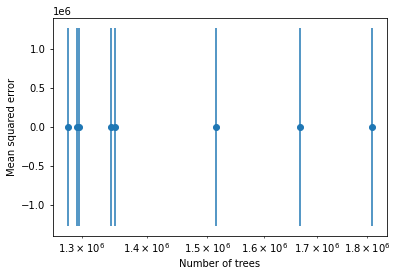

In [152]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the mean squared error for each number of trees
ax.errorbar(mse_values, tree_numbers, yerr=mse, fmt="o")

# Use a log scale for the x-axis
ax.set_xscale("log")

# Set the x-axis and y-axis labels
ax.set_xlabel("Number of trees")
ax.set_ylabel("Mean squared error")

# Show the plot
plt.show()


(e) Explain the rationale for fitting the model multiple time with different random states.

Random forests are repeated multiple times with different states in order to ensure diversity within the decision trees that are used in Random Forest regression. Fitting the same model repeatedly with different random states, allows the user to see how the model performs differently due to the randomness. This can be useful in detecting overfitting of the model, and in testing the stability of the model. If the model performs consistently over different random states, it indicates that it is not sensitive to the randomness in the training stage. 

## Question 6:
Clustering algorithms to identify different neuron types


(a) Perform a k-means cluster analysis, using the morphological measurements as the features. Run the clustering algorithm for different numbers of clusters (integers from 1 to 10). Plot the model performance as a function of the number of clusters and identify the optimal number of clusters for this data.

In [107]:
from sklearn.cluster import KMeans

# Loop through a range of values for the number of clusters
for num_clusters in range(2, 11):
  # Create a KMeans instance with the specified number of clusters
  kmeans = KMeans(n_clusters=num_clusters)

  # Fit the model to the data
  kmeans.fit(X)

  # Predict the cluster for each data point
  predictions = kmeans.predict(X)

Text(0, 0.5, 'Inertia')

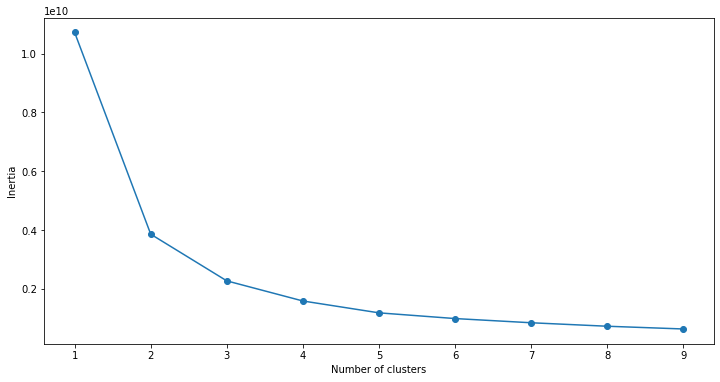

In [111]:
from sklearn.cluster import KMeans

SSE = []
for cluster in range(1,10):
    k_means = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    k_means.fit(X)
    SSE.append(k_means.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

We can conclude from this elbow plot that as the bend is at k=2 clusters, this is the optimal number of clusters for this data. 

(b) Perform a k-means cluster analysis, using the optimal number of clusters (identified in part (a)), and identify the most discriminatory variables.

In [113]:
from sklearn.feature_selection import SelectKBest

# Create a KMeans instance with the optimal number of clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the data and make predictions
kmeans.fit(X)
predictions = kmeans.predict(X)

# Use SelectKBest to compute scores for each variable
selector = SelectKBest(k="all")
selector.fit(X, predictions)

# Sort results by score and print most discriminatory variables
var_scores = sorted(zip(X.columns, selector.scores_), key=lambda x: x[1], reverse=True)
for var, score in var_scores[:10]:
  print(f"{var}: {score:.2f}")


total_length: 1424.70
number_nodes: 1374.65
total_volume: 632.43
overall_width: 409.71
number_bifurcations: 405.25
number_branches: 390.88
number_tips: 373.79
overall_height: 324.50
max_path_distance: 283.07
max_euclidean_distance: 269.88


(c) Create a series of scatter plots for the most discriminatory variables, colouring the points by cluster number. Discuss your findings. Do your findings support the claim that multiple categories of neurons, with distinctly different morphological properties, are included in this dataset?

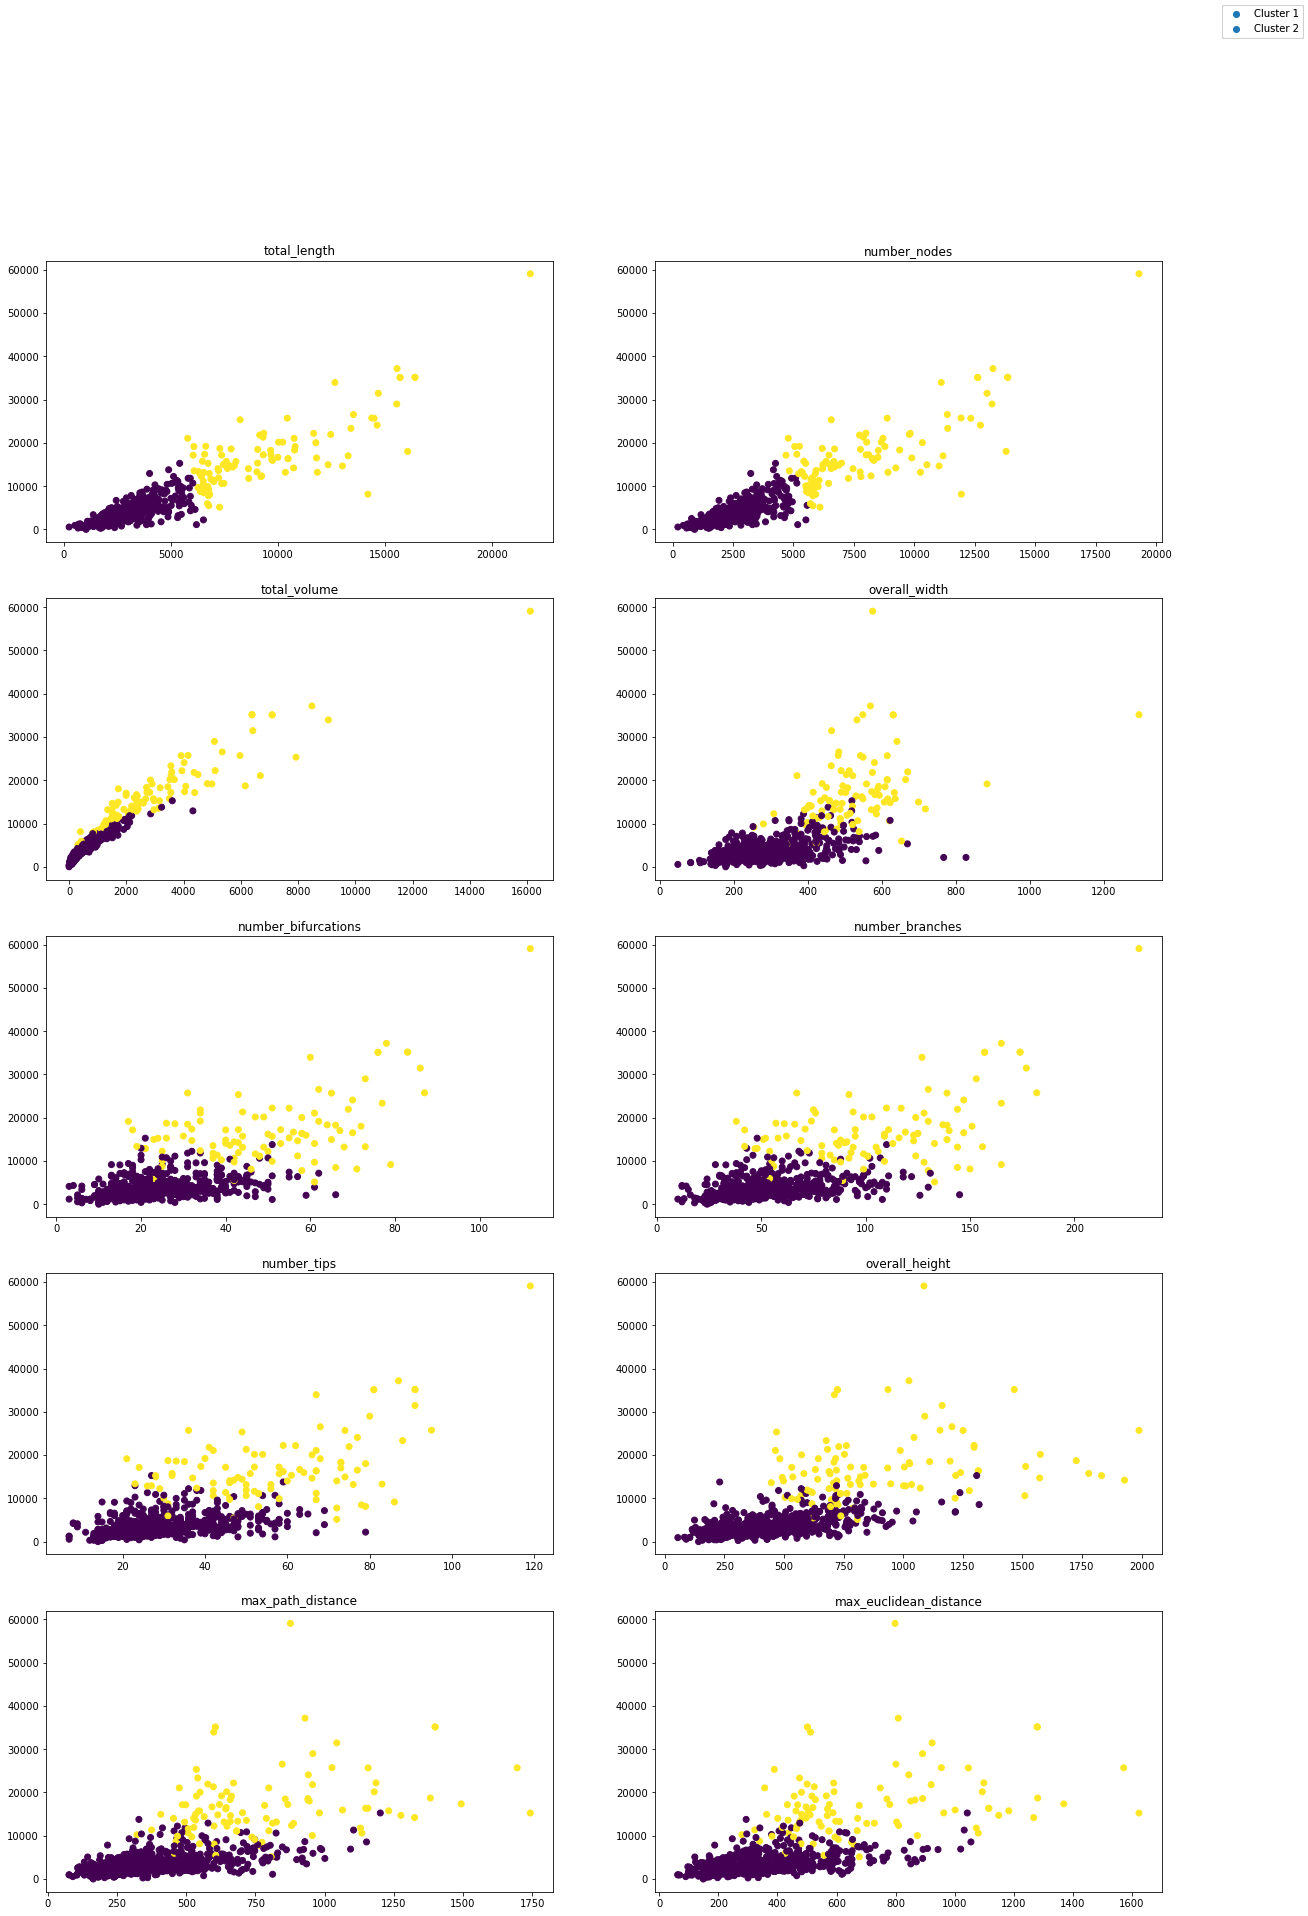

In [145]:
# Import necessary libraries
import matplotlib.pyplot as plt
preds = kmeans.predict(X)
# Get the column names of the most discriminatory variables
most_discriminatory_vars = ["total_length", "number_nodes", "total_volume", "overall_width", 
                            "number_bifurcations", "number_branches", "number_tips", "overall_height", 
                            "max_path_distance", "max_euclidean_distance"]

# Create a figure with multiple subplots
fig, axs = plt.subplots(5, 2, figsize=(20, 30))

# Loop through the subplots and create a scatter plot for each variable
for i, ax in enumerate(axs.flatten()):
    var = most_discriminatory_vars[i]
    ax.scatter(X[var], y, c=preds)
    ax.set_title(var)

#Cluster labels
    legend_labels = ["Cluster 1", "Cluster 2"]
    fig.legend(legend_labels)
    
# Show the plot
plt.show()


As we can see above, there seems to be 2 very clear different clusters in the data, suggesting that there are at least 2 different categories of neurons in the data, with distinctly different morphological charachters. This is clear as it is consistent within the scatterplots that there is a seperation between yellow and purple datapoints. 

(d) Identify another clustering algorithm that may be suitable for this data. Give an overview of your chosen algorithm and discuss the type of problems it works best for. Repeat part (a)–(c) using your chosen algorithm. Discuss your results in relation to those from the k-means cluster analysis.

In [200]:
# Import the necessary modules
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Create a connectivity matrix to represent the distance between data points
connectivity = kneighbors_graph(X_train, n_neighbors=10, include_self=False)

# Initialize the hierarchical clustering model with the parameters
model = AgglomerativeClustering(n_clusters=5, connectivity=connectivity)

# Fit the model to the data
model.fit(X_train)

# Access the cluster assignments for each data point
y_pred = model.labels_


Text(0.5, 0, 'X1')

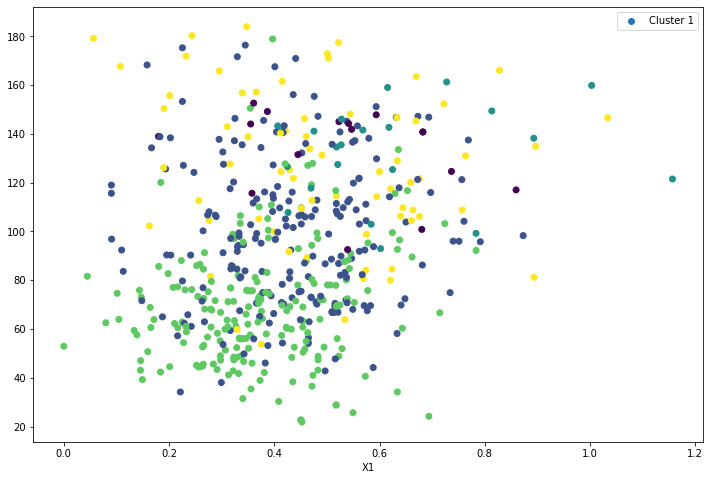

In [201]:
# Import the necessary modules
import matplotlib.pyplot as plt

# Create a scatter plot of the data points, coloring each point according to its cluster assignment
plt.figure(figsize=(12,8))
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_pred, cmap="viridis")

# Add labels for the axes and the plot title
plt.legend(["Cluster 1", "Cluster 2", "Cluster 3"])

plt.xlabel("X1")



After some research, it seemed that K-means clustering was definitely best suited to this data, however Hierarchical Clustering also seemed like a good option and as I hadn't used it before I chose that. Hierarchical clustering is more suited to smaller datasets, however in reality this dataset is relatively small. Some of the reasons it is not used more is that it can be quite expensive when used on large datasets. It is also well known that it doesnt deal well with missing data, or datasets that have a number of different data types within. I also found that the methods of displaying the analysis were quite difficult to work with, and some of the graphs were uninterpretable, however I think that the scatterplot above clearly shows us the number of different clusters achieved from this analysis. 